## 1. Import Libraries 

In [5]:
!pip install wordcloud



In [6]:
import numpy as np         # For numerical computing
import pandas as pd        # For data manipulation and analysis
import seaborn as sns      # For statistical data visualization
import matplotlib.pyplot as plt   # For creating plots and charts
import eda_helper_functions      # Assuming this is a custom module for EDA helper functions
from sklearn.ensemble import IsolationForest


## 2. Read the Training Data

In [7]:
file_path = "/Users/akshitanand/Desktop/flight-price-prediction/data/Trainf.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


In [8]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [9]:
train.assign(**{
    col: pd.to_datetime(train[col], errors='coerce', format='%Y-%m-%d %H:%M:%S') 
         for col in ["date_of_journey", "dep_time", "arrival_time"]
})


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,NaT,Mumbai,Hyderabad,NaT,NaT,90,0.0,In-flight meal not included,4995
1,Air India,NaT,Delhi,Cochin,NaT,NaT,1360,1.0,No Info,8372
2,Air India,NaT,Kolkata,Banglore,NaT,NaT,1555,2.0,No Info,6117
3,Vistara,NaT,Kolkata,Banglore,NaT,NaT,1595,1.0,No Info,7770
4,Vistara,NaT,Kolkata,Banglore,NaT,NaT,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,NaT,Banglore,Delhi,NaT,NaT,170,0.0,No Info,4282
636,Jet Airways,NaT,Kolkata,Banglore,NaT,NaT,690,1.0,No Info,13067
637,Indigo,NaT,Banglore,Delhi,NaT,NaT,165,0.0,No Info,4423
638,Multiple Carriers,NaT,Delhi,Cochin,NaT,NaT,735,1.0,No Info,7670


In [10]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


## 3. High-level Summary of Data

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [12]:
train.describe(include ="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,639.773438,0.792188,9075.418750
std,502.047906,0.654060,4328.022872
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5636.250000
50%,505.000000,1.000000,8372.000000
75%,956.250000,1.000000,12386.750000
max,2565.000000,3.000000,34273.000000


In [13]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,total_stops,additional_info
count,640,640,640,640,640,640,640.0,640
unique,8,40,5,6,165,158,4.0,4
top,Jet Airways,2019-05-09,Delhi,Cochin,07:10:00,04:25:00,1.0,No Info
freq,248,33,263,263,20,36,351.0,488


## 4. High-Level analysis of missing values 

In [14]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


## 5. High-level analysis of outliers

In [15]:
forest = IsolationForest(n_estimators=10,random_state=42)

In [16]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier == -1")
    # .duration
    # .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995,-1
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372,-1
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117,-1
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770,-1
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Spicejet,2019-05-09,Mumbai,Hyderabad,05:45:00,07:15:00,90,0.0,No check-in baggage included,1965,-1
627,Air India,2019-03-21,Delhi,Cochin,19:45:00,19:15:00,1410,2.0,No Info,8236,-1
630,Air India,2019-05-12,Kolkata,Banglore,10:00:00,01:20:00,920,2.0,No Info,13243,-1
632,Jet Airways,2019-03-24,Kolkata,Banglore,21:10:00,22:35:00,1525,1.0,In-flight meal not included,10031,-1


## 6. Pair Plots

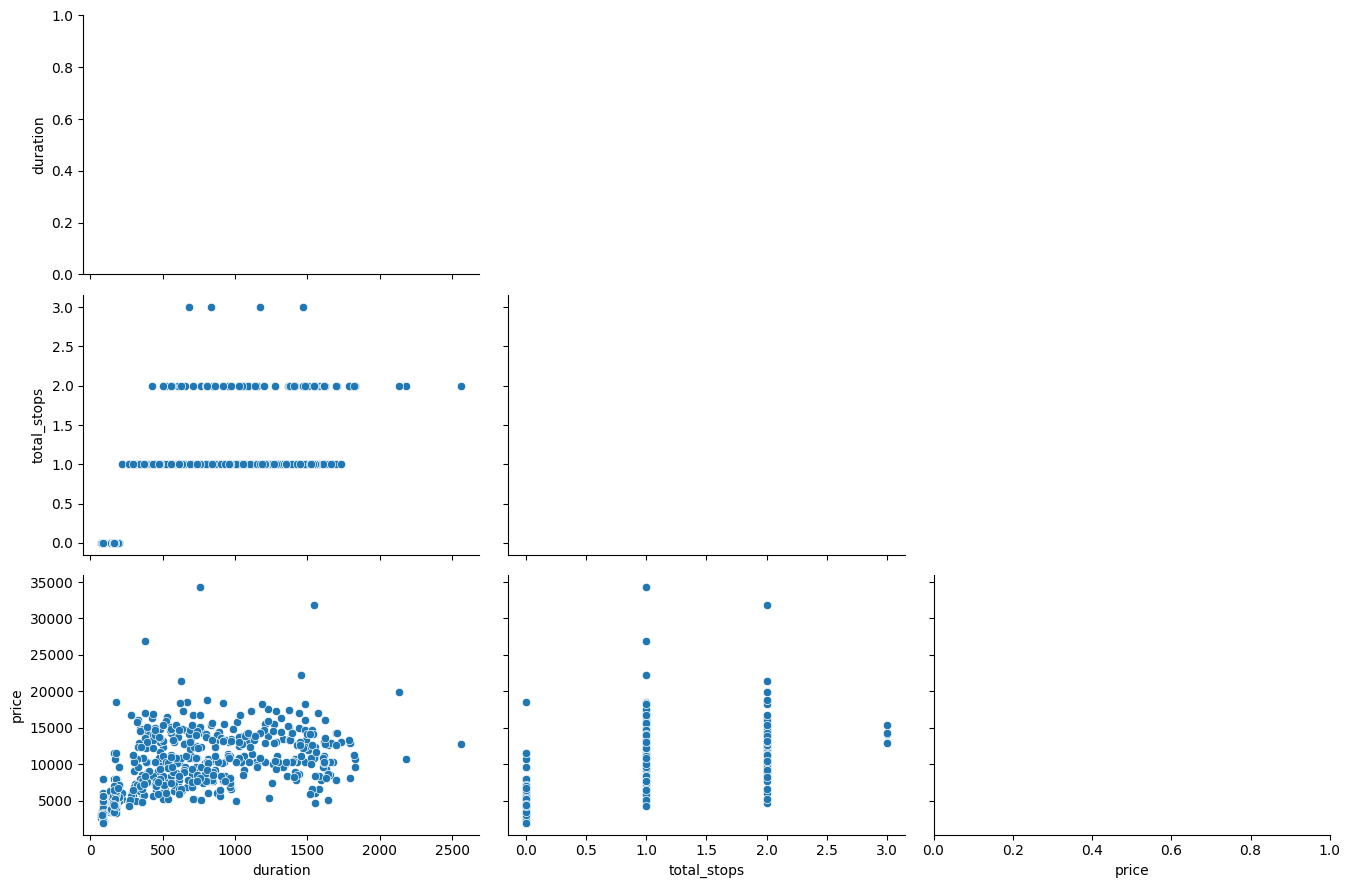

In [17]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis 

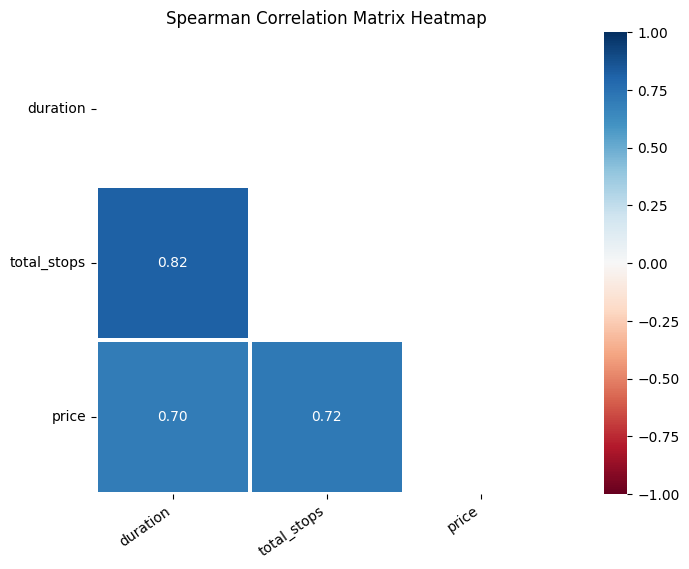

In [18]:
eda_helper_functions.correlation_heatmap(train)